Task 2 :- User Engagement Analysis

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the Dataset
Telecom_data = pd.read_excel(r"C:\Users\Admin\Desktop\telcom_data.xlsx")

In [5]:
# shape the data
Telecom_data.shape

(150001, 55)

In [7]:
#Finding Baisc Information about Data:
Telecom_data.tail

<bound method NDFrame.tail of                    Bearer Id               Start  Start ms  \
0       13114483460844900352 2019-04-04 12:01:18       770   
1       13114483482878900224 2019-04-09 13:04:04       235   
2       13114483484080500736 2019-04-09 17:42:11         1   
3       13114483485442799616 2019-04-10 00:31:25       486   
4       13114483499480700928 2019-04-12 20:10:23       565   
...                      ...                 ...       ...   
149996   7277825670196679680 2019-04-29 07:28:42       451   
149997   7349883264234609664 2019-04-29 07:28:42       483   
149998  13114483573367300096 2019-04-29 07:28:43       283   
149999  13114483573367300096 2019-04-29 07:28:43       696   
150000                       2019-04-29 07:08:38       499   

                       End  End ms  Dur. (ms)             IMSI  MSISDN/Number  \
0      2019-04-25 14:35:31     662    1823652  208201448079117    33664962239   
1      2019-04-25 08:15:48     606    1365104  208201909211140 

Calculate Session Frequency:

In [23]:
Telecom_data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770,2019-04-25 14:35:31,662,1823652,208201448079117,33664962239,35521209507511,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235,2019-04-25 08:15:48,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1,2019-04-25 11:58:13,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486,2019-04-25 07:36:35,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565,2019-04-25 10:40:32,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814,569138589.0


In [25]:
session_frequency_IMSI = Telecom_data.groupby('IMSI')['Bearer Id'].count().reset_index()
session_frequency_IMSI.columns = ['IMSI', 'Session Frequency']

In [27]:
session_frequency_IMSI.head()

,IMSI,Session Frequency
0,204047108489451,1
1,204080810288647,1
2,208200101016140,1
3,208200101127285,1
4,208200101148045,2


Calculate Duration of the Session:

In [29]:
session_duration_IMSI = Telecom_data.groupby('IMSI')['Dur. (ms)'].sum().reset_index()
session_duration_IMSI.columns = ['IMSI', 'Total Session Duration (ms)']

In [31]:
session_duration_IMSI.head()

,IMSI,Total Session Duration (ms)
0,204047108489451,869844
1,204080810288647,877385
2,208200101016140,86019
3,208200101127285,86254
4,208200101148045,573923


Observations :- These metrics together provide a multi-dimensional view of user engagement. Users with high session frequency, longer average session durations, and higher total traffic are generally more engaged. They are using the service frequently, spending more time per session, and consuming more data overall.

Calculate Session Total Traffic:

In [33]:
Telecom_data['Total Traffic (Bytes)'] = Telecom_data['Total DL (Bytes)'] + Telecom_data['Total UL (Bytes)']

In [35]:
total_traffic_IMSI = Telecom_data.groupby('IMSI')['Total Traffic (Bytes)'].sum().reset_index()
total_traffic_IMSI.columns = ['IMSI', 'Total Traffic (Bytes)']

In [37]:
total_traffic_IMSI.head()

,IMSI,Total Traffic (Bytes)
0,204047108489451,1.391536e+08
1,204080810288647,2.321240e+08
2,208200101016140,8.517164e+07
3,208200101127285,4.265016e+08
4,208200101148045,1.033092e+09


Merge the metrics into a single data

In [39]:
user_engagement_IMSI = session_frequency_IMSI.merge(session_duration_IMSI, on='IMSI')
user_engagement_IMSI = user_engagement_IMSI.merge(total_traffic_IMSI, on='IMSI')

In [41]:
user_engagement_IMSI.head()

,IMSI,Session Frequency,Total Session Duration (ms),Total Traffic (Bytes)
0,204047108489451,1,869844,1.391536e+08
1,204080810288647,1,877385,2.321240e+08
2,208200101016140,1,86019,8.517164e+07
3,208200101127285,1,86254,4.265016e+08
4,208200101148045,2,573923,1.033092e+09


◆ Analysis the Engagement Scores:

Plot Histograms of the Engagement metrics:

Text(0.5, 1.0, 'Session Frequency Distribution')

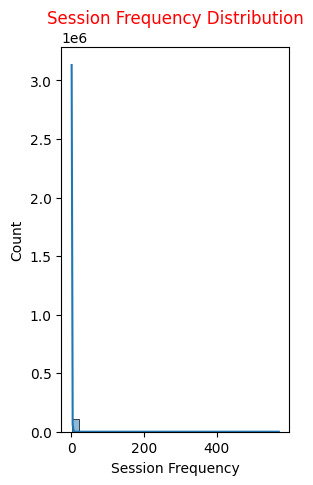

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1, 3, 1)
sns.histplot(user_engagement_IMSI['Session Frequency'], bins=30, kde=True)
plt.title('Session Frequency Distribution', color='red')

Text(0.5, 1.0, 'Total Session Duration Distribution')

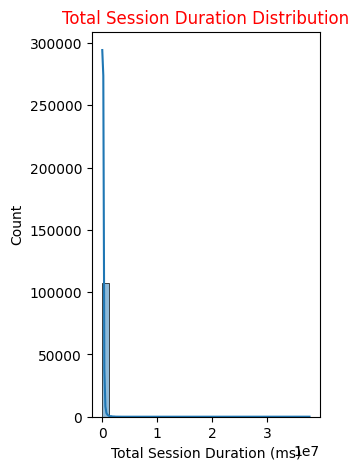

In [45]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 2)
sns.histplot(user_engagement_IMSI['Total Session Duration (ms)'], bins=30, kde=True)
plt.title('Total Session Duration Distribution', color='red')

Text(0.5, 1.0, 'Total Traffic Distribution')

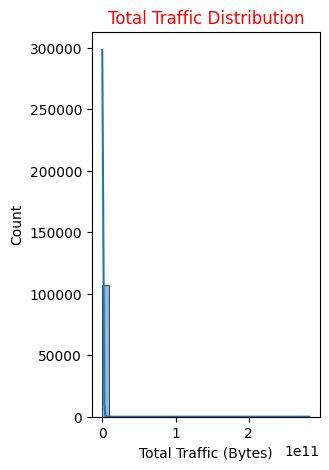

In [47]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 3)
sns.histplot(user_engagement_IMSI['Total Traffic (Bytes)'], bins=30, kde=True)
plt.title('Total Traffic Distribution', color='red')

Aggregate Metrics Per Customer ID (MSISDN):
Calculate session frequency per MSISDN:

In [49]:
session_frequency_MSISDN = Telecom_data.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
session_frequency_MSISDN.columns = ['MSISDN/Number', 'Session Frequency']

In [51]:
session_frequency_IMSI.head()

,IMSI,Session Frequency
0,204047108489451,1
1,204080810288647,1
2,208200101016140,1
3,208200101127285,1
4,208200101148045,2


Calculate total session duration per MSISDN:

In [55]:
session_duration_MSISDN = Telecom_data.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index()
session_duration_MSISDN.columns = ['MSISDN/Number', 'Total Session Duration (ms)']

In [57]:
session_duration_MSISDN.head()

,MSISDN/Number,Total Session Duration (ms)
0,33601001722,116720
1,33601001754,181230
2,33601002511,134969
3,33601007832,49878
4,33601008617,37104


Calculate total traffic per MSISDN:

In [59]:
total_traffic_MSISDN = Telecom_data.groupby('MSISDN/Number')['Total Traffic (Bytes)'].sum().reset_index()
total_traffic_MSISDN.columns = ['MSISDN/Number', 'Total Traffic (Bytes)']

In [61]:
total_traffic_MSISDN.head()

,MSISDN/Number,Total Traffic (Bytes)
0,33601001722,8.786906e+08
1,33601001754,1.568596e+08
2,33601002511,5.959665e+08
3,33601007832,4.223207e+08
4,33601008617,1.457411e+09


Merge the metrics into a single dataframe:

In [63]:
user_engagement_MSISDN = session_frequency_MSISDN.merge(session_duration_MSISDN, on='MSISDN/Number')
user_engagement_MSISDN = user_engagement_MSISDN.merge(total_traffic_MSISDN, on='MSISDN/Number')

Report the top 10 customers per engagement metric:

In [65]:
top_10_session_frequency = user_engagement_MSISDN.nlargest(10, 'Session Frequency')

In [67]:
top_10_session_frequency

,MSISDN/Number,Session Frequency,Total Session Duration (ms),Total Traffic (Bytes)
53644,33663706799,1067,72655568,5.319636e+11
13526,33626320676,18,8791927,7.971167e+09
6437,33614892860,17,9966898,8.846226e+09
13180,33625779332,17,18553754,8.499621e+09
37052,33659725664,16,4035428,7.705863e+09
76363,33675877202,15,4865947,7.891111e+09
92923,33760536639,15,9279434,8.514774e+09
65118,33667163239,13,8744914,5.618394e+09
666,33603127838,12,6287761,4.976195e+09
1279,33604515716,12,5207990,5.487855e+09


Normalize Metrics and Run K-Means:

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [71]:
scaler = StandardScaler()
normalized_metrics = scaler.fit_transform(user_engagement_MSISDN[['Session Frequency', 
                                                           'Total Session Duration (ms)', 
                                                           'Total Traffic (Bytes)']])

In [73]:
Run k-means clustering (k=3):

SyntaxError: invalid syntax (1423939892.py, line 1)

In [75]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(normalized_metrics)
user_engagement_MSISDN['Cluster'] = kmeans.labels_

In [77]:
#Compute statistics for each cluster
cluster_stats = user_engagement_MSISDN.groupby('Cluster').agg({
    'Session Frequency': ['min', 'max', 'mean', 'sum'],
    'Total Session Duration (ms)': ['min', 'max', 'mean', 'sum'],
    'Total Traffic (Bytes)': ['min', 'max', 'mean', 'sum']
})

In [79]:
cluster_stats

Session Frequency                             \
                      min   max         mean     sum   
Cluster                                                
0                       1    18     3.226192   28626   
1                    1067  1067  1067.000000    1067   
2                       1     4     1.227858  120308   

        Total Session Duration (ms)                                       \
                                min       max          mean          sum   
Cluster                                                                    
0                             89973  18553754  5.047891e+05   4478993749   
1                          72655568  72655568  7.265557e+07     72655568   
2                              7142    433962  1.136915e+05  11139721134   

        Total Traffic (Bytes)                                            
                          min           max          mean           sum  
Cluster                                                                  
0                5.714004e+07  8.846226e+09  1.651840e+09  1.465678e+13  
1                5.319636e+11  5.319636e+11  5.319636e+11  5.319636e+11  
2                3.324901e+07  2.762548e+09  6.039523e+08  5.917645e+13

Aggregate User Total Traffic Per Application:

In [81]:
application_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)',
                      'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
                      'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
                      'Netflix UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
                      'Other DL (Bytes)', 'Other UL (Bytes)']

In [83]:
# Calculate total traffic per application
for app in application_columns:
    Telecom_data[app + ' Total'] = Telecom_data[app]

In [85]:
# Sum the total traffic per application per user
application_traffic = Telecom_data.groupby('MSISDN/Number')[['Social Media DL (Bytes) Total', 
                                                   'Social Media UL (Bytes) Total',
                                                   'Google DL (Bytes) Total', 
                                                   'Google UL (Bytes) Total', 
                                                   'Email DL (Bytes) Total',
                                                   'Email UL (Bytes) Total',
                                                   'Youtube DL (Bytes) Total', 
                                                   'Youtube UL (Bytes) Total', 
                                                   'Netflix DL (Bytes) Total', 
                                                   'Netflix UL (Bytes) Total', 
                                                   'Gaming DL (Bytes) Total', 
                                                   'Gaming UL (Bytes) Total', 
                                                   'Other DL (Bytes) Total', 
                                                   'Other UL (Bytes) Total']].sum().reset_index()

Derive the top 10 most engaged users per application:

In [87]:
top_10_per_app = {}
for app in application_columns:
    app_col = app + ' Total'
    top_10_per_app[app] = application_traffic.nlargest(10, app_col)

In [89]:
top_10_per_app

{'Social Media DL (Bytes)':         MSISDN/Number  Social Media DL (Bytes) Total  \
 53644     33663706799                   1.938043e+09   
 13526     33626320676                   4.274384e+07   
 92923     33760536639                   3.929765e+07   
 37052     33659725664                   3.490044e+07   
 6437      33614892860                   2.774974e+07   
 13180     33625779332                   2.656412e+07   
 65118     33667163239                   2.375375e+07   
 106137    33786323068                   2.356866e+07   
 70960     33669068942                   2.347705e+07   
 666       33603127838                   2.277668e+07   
 
         Social Media UL (Bytes) Total  Google DL (Bytes) Total  \
 53644                    3.615635e+07             6.009292e+09   
 13526                    6.309420e+05             1.161065e+08   
 92923                    4.855430e+05             8.862653e+07   
 37052                    5.119140e+05             9.095855e+07   
 6437    

Slide Presentation:
• Show top 10 customers for session frequency, total session duration, and total traffic

• Include data tables or charts

Plot Top 3 Most Used Applications:

In [91]:
application_totals = application_traffic.sum().reset_index()
application_totals.columns = ['Application', 'Total Traffic (Bytes)']

In [93]:
application_totals

,Application,Total Traffic (Bytes)
0,MSISDN/Number,4.820780e+15
1,Social Media DL (Bytes) Total,2.693001e+11
2,Social Media UL (Bytes) Total,4.939298e+09
3,Google DL (Bytes) Total,8.626186e+11
4,Google UL (Bytes) Total,3.084833e+11
5,Email DL (Bytes) Total,2.687611e+11
6,Email UL (Bytes) Total,7.010648e+10
7,Youtube DL (Bytes) Total,1.745123e+12
8,Youtube UL (Bytes) Total,1.651423e+12
9,Netflix DL (Bytes) Total,1.744039e+12


Filter out the MSISDN column:

In [95]:
application_totals = application_totals[application_totals['Application'] != 'MSISDN/Number']

In [97]:
top_3_apps = application_totals.nlargest(3, 'Total Traffic (Bytes)')

In [99]:
top_3_apps

,Application,Total Traffic (Bytes)
11,Gaming DL (Bytes) Total,6.330713e+13
13,Other DL (Bytes) Total,6.316550e+13
7,Youtube DL (Bytes) Total,1.745123e+12


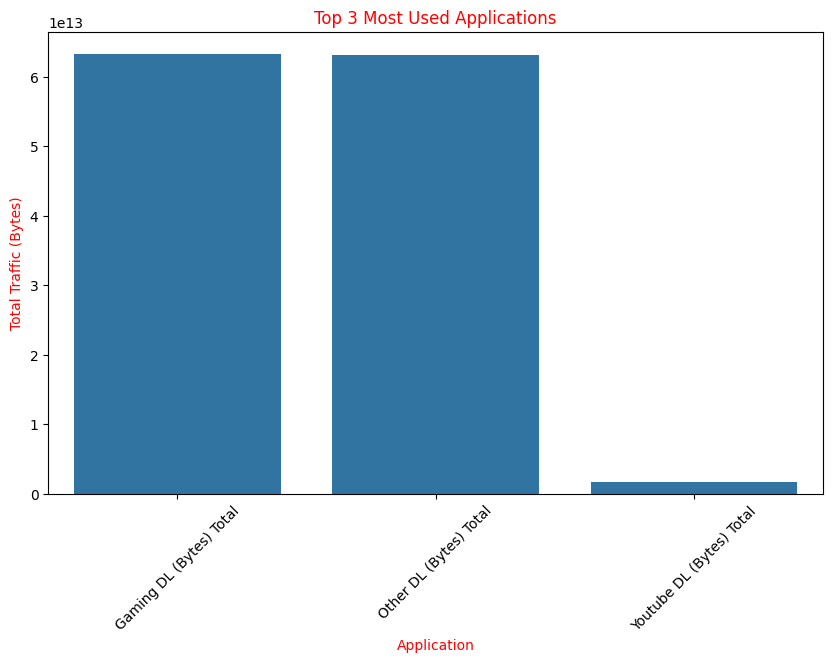

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Application', y='Total Traffic (Bytes)', data=top_3_apps)
plt.title('Top 3 Most Used Applications', color='red')
plt.xlabel('Application', color='red')
plt.ylabel('Total Traffic (Bytes)', color='red')
plt.xticks(rotation=45)
plt.show()

Optimize k for K-Means Using the Elbow Method:

In [103]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

Plot the elbow curve:

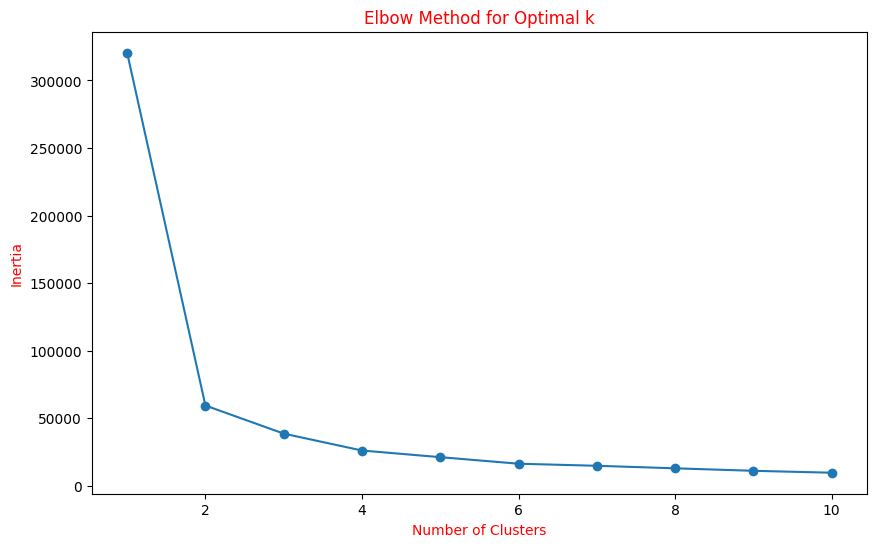

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k', color='red')
plt.xlabel('Number of Clusters', color='red')
plt.ylabel('Inertia', color='red')
plt.show()

In [109]:
Telecom_data.shape

(150001, 70)

In [113]:
Telecom_data = pd.read_excel(r"C:\Users\Admin\Desktop\telcom_data.xlsx")